In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import pickle

import sys
repo_base_path = Path("./../").resolve()
assert str(repo_base_path).endswith("csg_is"), f"{repo_base_path} is not a valid path to the CSG_IS repository" 

sys.path.append(str(repo_base_path))

# from py_dataset import get_all_files_df
# from py_dataset import read_in_files
from py_dataset import feature_plotting
# from py_dataset import feature_selection
# from py_dataset import net_feature_engineering
# from py_dataset import entropy_feature_engineering
# from py_dataset.classes import DataSource
from py_dataset import sys_func

from py_dataset.classes import DataSource



In [3]:
def collect_data_sources(columns):
    data_sources = []
    for column in columns:
        try:
            dtype = DataSource.from_single_column(column)
            
            # ResourceUsageEvents_RP4 and ResourceUsageEvents should be same in plot below
            if dtype is DataSource.ResourceUsageEvents_RP4:
                dtype = DataSource.ResourceUsageEvents
            data_sources.append(dtype)
        except ValueError as e:
            if str(column).endswith("_data"):
                dtype = "_".join(str(column).split("_")[-2:])
                
                dtype = DataSource.from_string_name(dtype)
                data_sources.append(dtype)
            else:
                data_sources.append(DataSource.SystemCalls)
    
    return data_sources

In [12]:
df

,feature
0,ext4:ext4_readpage
1,seconds
2,cpu-migrations
3,stat64
4,util
...,...
255,read
256,iowritebytes
257,net_in
258,setgroups32


In [13]:
df = pd.read_csv("../top_260_features.txt", names=["feature"])
df.head(1)
df["data_source"] = collect_data_sources(df["feature"])
print(df["data_source"].unique())
df["file_path"] = Path("../top_260_features.txt")

[<DataSource.FileSystem: {'ext4:ext4_getfsmap_mapping', 'ext4:ext4_mb_release_inode_pa', 'ext4:ext4_direct_IO_exit', 'jbd2:jbd2_handle_extend', 'jbd2:jbd2_end_commit', 'writeback:sb_clear_inode_writeback', 'block:block_bio_frontmerge', 'ext4:ext4_es_shrink_scan_enter', 'ext4:ext4_writepage', 'ext4:ext4_mb_new_group_pa', 'jbd2:jbd2_checkpoint_stats', 'seconds', 'ext4:ext4_ext_show_extent', 'ext4:ext4_ext_rm_leaf', 'ext4:ext4_truncate_enter', 'writeback:wait_on_page_writeback', 'filemap:file_check_and_advance_wb_err', 'ext4:ext4_direct_IO_enter', 'ext4:ext4_es_cache_extent', 'jbd2:jbd2_start_commit', 'writeback:track_foreign_dirty', 'filemap:mm_filemap_add_to_page_cache', 'ext4:ext4_journalled_invalidatepage', 'writeback:wbc_writepage', 'jbd2:jbd2_commit_flushing', 'writeback:global_dirty_state', 'ext4:ext4_es_insert_extent', 'ext4:ext4_fallocate_enter', 'ext4:ext4_ext_rm_idx', 'ext4:ext4_get_reserved_cluster_alloc', 'ext4:ext4_es_find_extent_range_exit', 'connectivity', 'block:block_rq_

In [14]:
# files = list((repo_base_path / "training" / "single_layer" / "other_time_windows").glob("weight_selected_*.csv"))

# dfs = []
# dfs.append(df)

# for file_path in files:
#     df = pd.read_csv(str(file_path))
#     df["data_source"] = collect_data_sources(df["0"])
#     df["file_path"] = file_path

#     dfs.append(df)
all_df = pd.concat(dfs)

In [15]:
all_df = df

In [16]:
all_df["data_source"].value_counts().keys()

Index([           DataSource.SystemCalls,    DataSource.ResourceUsageEvents,
                   DataSource.FileSystem,           DataSource.KernelEvents,
       DataSource.BlockInputOutputEvents],
      dtype='object')

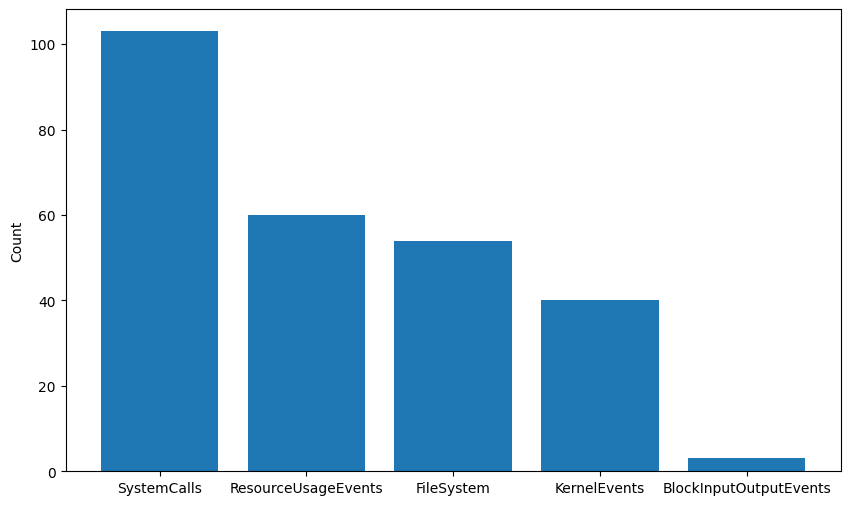

In [19]:
import matplotlib.pyplot as plt

dic = all_df["data_source"].value_counts()
key_strs = [str(f).removeprefix("DataSource.") for f in dic.keys()]

plt.figure(figsize=(10, 6))
plt.bar(range(dic.count()), dic.values)
# plt.xlabel('Selected Data Source')
plt.ylabel('Count')
# plt.title('')
plt.xticks(range(dic.count()),key_strs, rotation=0)
plt.show()

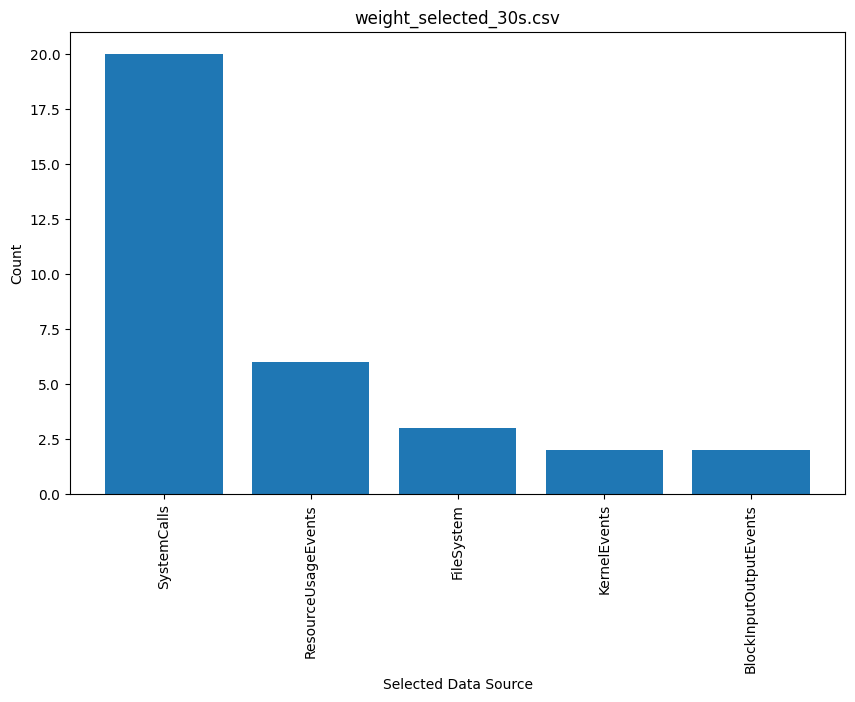

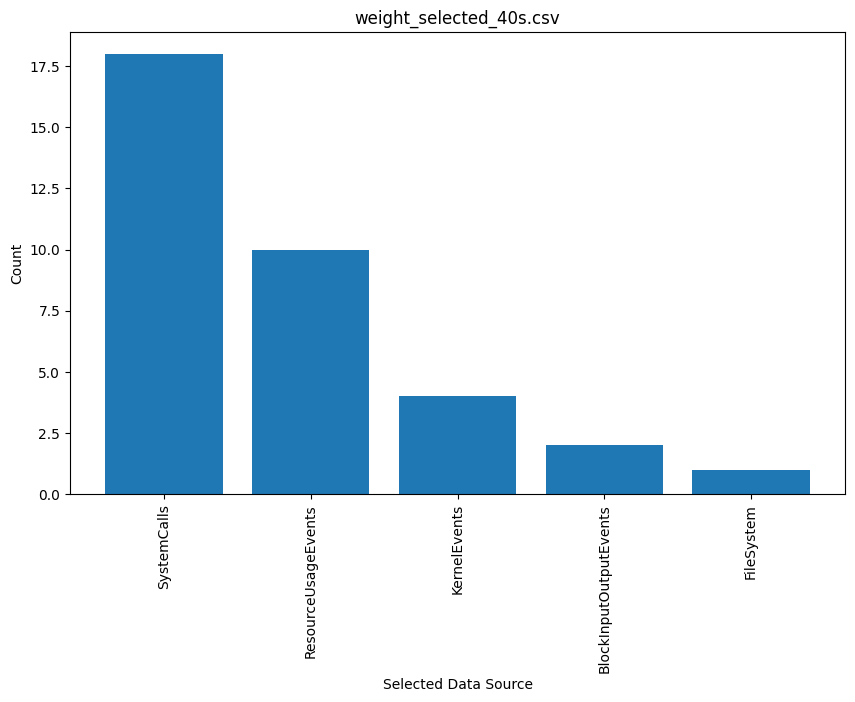

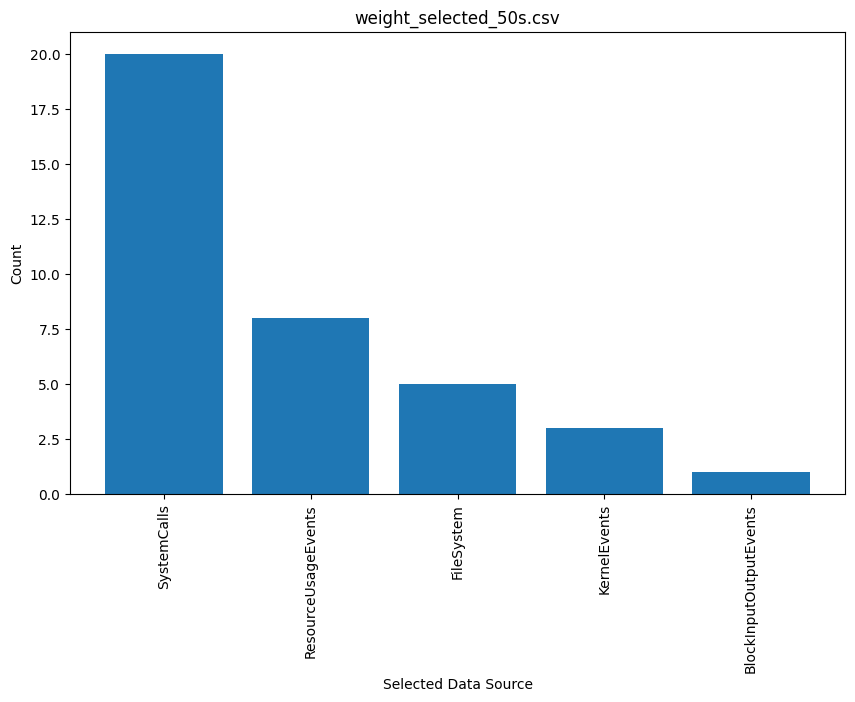

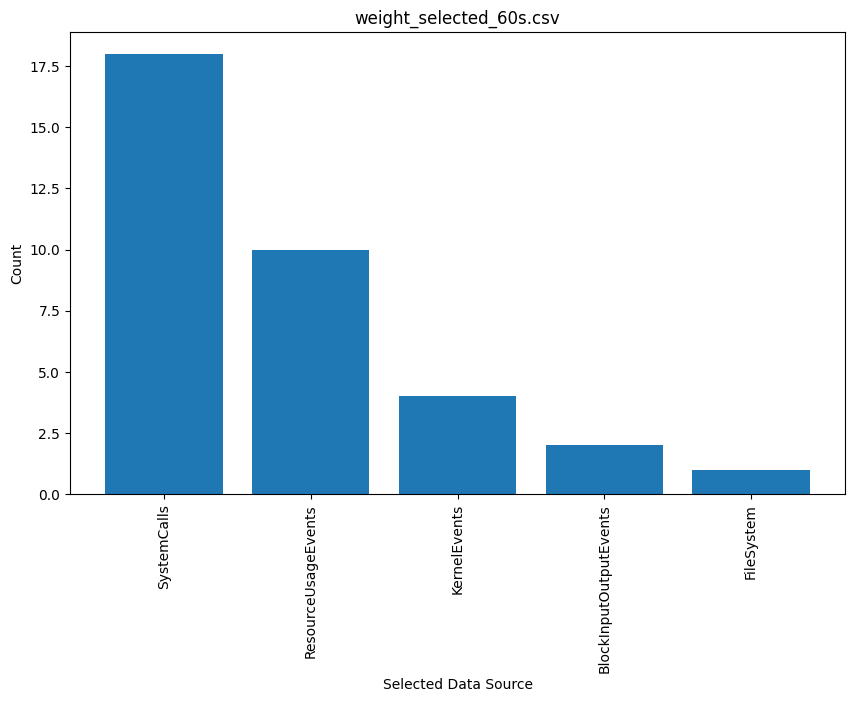

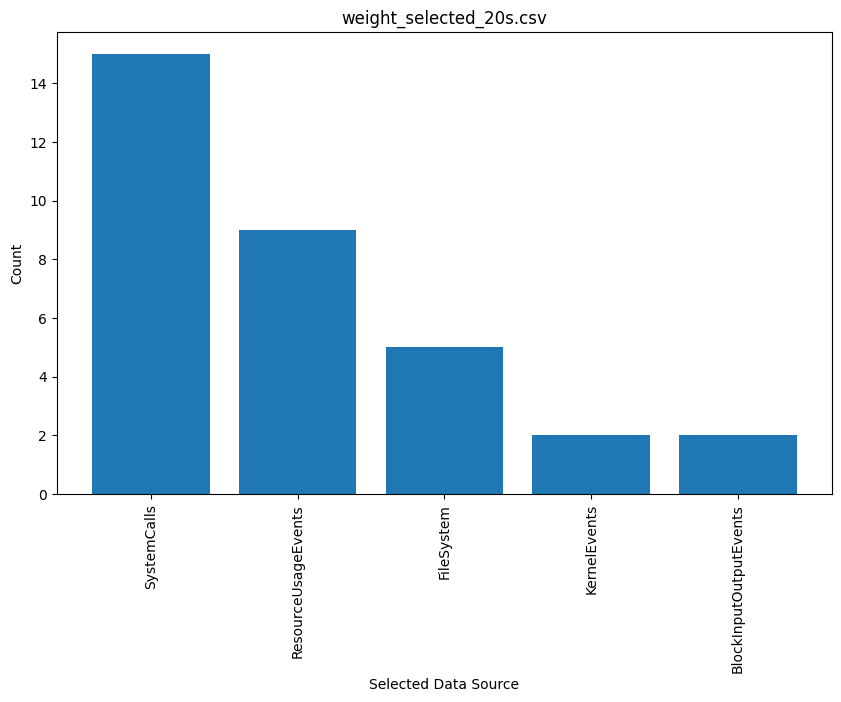

In [30]:
for x, group_df in all_df.groupby("file_path"):
    import matplotlib.pyplot as plt

    dic = group_df["data_source"].value_counts()
    key_strs = [str(f).removeprefix("DataSource.") for f in dic.keys()]

    plt.figure(figsize=(10, 6))
    plt.bar(range(dic.count()), dic.values)
    plt.xlabel('Selected Data Source')
    plt.ylabel('Count')
    plt.title(f'{x.name}')
    plt.xticks(range(dic.count()),key_strs, rotation=90)
    plt.show()